In [1]:
# Import the usual stuff
import numpy as np
import matplotlib.pyplot as plt

# Path to harmonic oscillator modules
import sys
import os
module_path=os.path.abspath('/Users/zentner/Work/PhysicsModels/schrodinger1d')
if module_path not in sys.path:
    sys.path.append(module_path)

import schrodinger_solver_1d as sch
import potentials_1d as pot
import wavefunctions as psi

In [2]:
# ---- my spatial and Fourier grid ----
N = 2**13
y_max = 5.0
grid = sch.make_grid(N, y_max)

In [3]:
# ---- initial state ----
t0 = 0.0 # initial time
n0 = 1 # initial eigenstate, n=1 is ground state of particle in a box!
psi0 = psi.box_eigenstate(grid.y, n0) # the wavefunction, start in state n0
e0 = psi.box_energy(n0) # energy of the intial state.
print(rf'The energy of the initial state is {e0:.2e} in units of $\hbar^2/mL^2$')

#----- set up a square_well potential callable
v0 = 50.0*e0
v_box = pot.SymmetricBox(50.0*e0)

The energy of the initial state is 4.93e+00 in units of $\hbar^2/mL^2$


In [4]:
# ---- time grid ----
tmax = 20.0/e0 # set the timestep according to the natural scale of evolution.
dt = 0.2/v0
Nt = int(round(tmax/dt))
tau_grid=dt*np.arange(Nt-1)
tau_grid[-1]=tmax
print(f' The final time for the system is {tmax:.2e}')
print(f' The number of timesteps is {tau_grid.size:d}')

# ---- evolve using fft ----
psi_t, diag = sch.yoshida_step_propagate(psi0=psi0,
                            V_of_y_tau=v_box,
                            tau_grid=tau_grid,
                            grid=grid,
                            return_all=True)

# ---- check the drift of the normalization ---
print("Norm drift:", diag["norm"].min(), diag["norm"].max())
if ( np.abs(diag["norm"].max() - diag["norm"].min()) > 1.0e-4 ):
    print(" Unacceptably large norm drift.")
print(' ')

 The final time for the system is 4.05e+00
 The number of timesteps is 4999
Norm drift: 1.0 1.0000000000011966
 


In [5]:
#---- evolve using DST ----
dst_grid = sch.make_grid_dirichlet(N, y_max)
psi0_dst=psi.box_eigenstate(dst_grid.y,n0)
psi_t_dst, diag_dst = sch.yoshida_step_propagate_dirichlet(psi0=psi0_dst,
                            V_of_y_tau=v_box,
                            tau_grid=tau_grid,
                            grid=dst_grid,
                            return_all=True)
# ---- check the drift of the normalization ---
print("Norm drift:", diag["norm"].min(), diag["norm"].max())
if ( np.abs(diag["norm"].max() - diag["norm"].min()) > 1.0e-4 ):
    print(" Unacceptably large norm drift.")
print(' ')

Norm drift: 1.0 1.0000000000011966
 


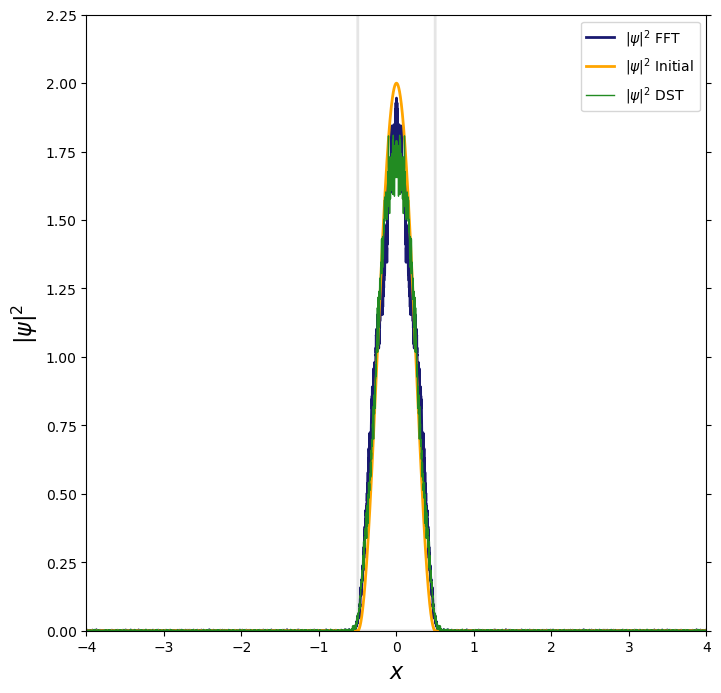

In [6]:
#Plot |psi|^2 #
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.tick_params(right=True)

v=v_box(grid.y,diag["tau"][0])

plt.plot(grid.y,v,linewidth=2.0,color='black',alpha=0.1)
plt.plot(grid.y,np.abs(psi_t[-1])**2,linewidth=2.0,color='midnightblue',label=r'$\vert \psi \vert^2$ FFT')
plt.plot(grid.y,np.abs(psi_t[0])**2,linewidth=2.0,color='orange',label=r'$\vert \psi \vert^2$ Initial')
plt.plot(dst_grid.y,np.abs(psi_t_dst[-1])**2,linewidth=1.0,color='forestgreen',label=r'$\vert \psi \vert^2$ DST')

plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$\vert \psi \vert^2$",fontsize=16)
#plt.figure(figsize=(20,20))
fig.set_facecolor("white")

plt.xlim(-4.0,4.0)
plt.ylim(0.0,2.25)

plt.legend()
plt.show()

/var/folders/5l/6n222m65541_bvbyr8lv79z80000gn/T/ipykernel_40024/1847121513.py:11: RuntimeWarning: divide by zero encountered in divide
  ratio_fft = np.abs(psi_t[-1])**2/np.abs(psi0)**2
/var/folders/5l/6n222m65541_bvbyr8lv79z80000gn/T/ipykernel_40024/1847121513.py:12: RuntimeWarning: divide by zero encountered in divide
  ratio_dst = np.abs(psi_t_dst[-1]**2)/np.abs(psi0_dst)**2


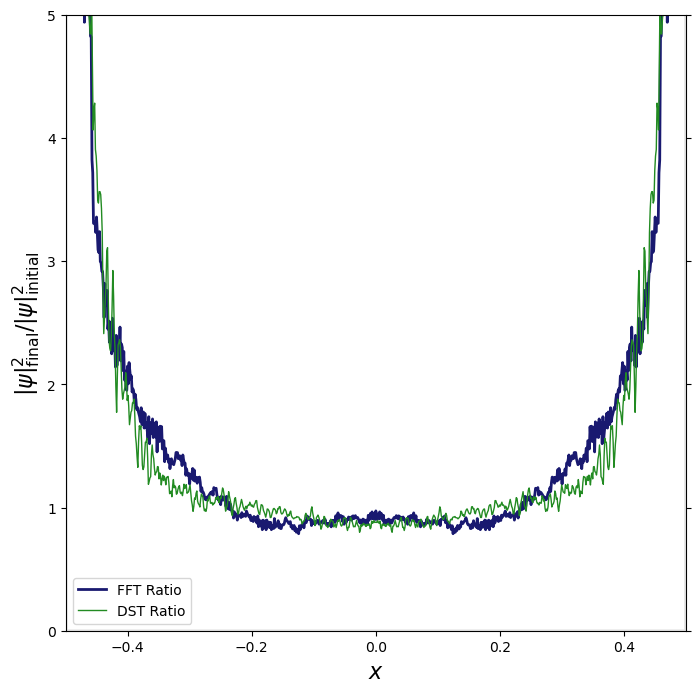

In [7]:
#Plot |psi|^2 ratios #
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.tick_params(right=True)

v=v_box(grid.y,diag["tau"][0])

plt.plot(grid.y,v,linewidth=2.0,color='black',alpha=0.1)

# -- for fft
ratio_fft = np.abs(psi_t[-1])**2/np.abs(psi0)**2
ratio_dst = np.abs(psi_t_dst[-1]**2)/np.abs(psi0_dst)**2

plt.plot(grid.y,ratio_fft,linewidth=2.0,color='midnightblue',label=r'FFT Ratio')
plt.plot(dst_grid.y,ratio_dst,linewidth=1.0,color='forestgreen',label=r'DST Ratio')

plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$\vert \psi \vert^2_{\rm final} / \vert \psi \vert^2_{\rm initial}$",fontsize=16)
#plt.figure(figsize=(20,20))
fig.set_facecolor("white")

plt.xlim(-0.4999,0.4999)
plt.ylim(0.0,5.0)

plt.legend()
plt.show()